In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
mnist = pd.read_csv("train.csv")
mnist.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [16]:
X = mnist.drop('label', axis = 1)
y = mnist[['label']]
print(X.shape)
print(y.shape)

(42000, 784)
(42000, 1)


In [17]:
some_digit = X.iloc[2200]
some_digit_img = some_digit.values.reshape(28, 28)

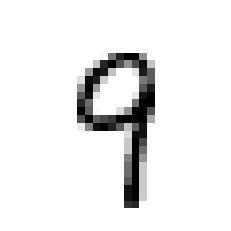

In [6]:
plt.imshow(some_digit_img, cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [18]:
def plot_digit(value):
    image = value.values.reshape(28,28)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.axis('off')

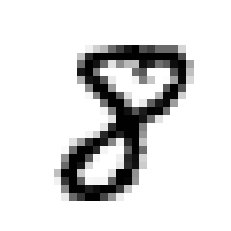

In [8]:
plot_digit(X.iloc[2100])

# Training and Testing

In [9]:
# write own split logic
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_idx = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_idx = shuffled_idx[:test_set_size]
    train_idx = shuffled_idx[test_set_size:]
    
    return data.iloc[train_idx], data.iloc[test_idx]

In [10]:
train_set, test_set = split_train_test(mnist, 0.2)

print(len(train_set), "train + ", len(test_set), "test")

33600 train +  8400 test


In [11]:
len(mnist)

42000

# other way using scikit learn's built in function

Random Sampling

`from sklearn.model_selection import train_test_split
train_split, test_split = train_test_split(mnist, test_size = 0.2, random_state = 42`

Stratified Sampling

`from sklearn.model_selection import StratifiedShuffledSplit
for train_idx, test_idx in split.split(mnist, mnist['label']):
    start_train_set = data.loc[train_idx]
    start_test_set = data.loc[test_idx]`
    
## If database is smaller then it is better to go with Stratified Sampling


In [4]:
dataset= pd.read_csv('train.csv')

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [6]:
X_train, y_train = train_set.drop('label', axis = 1),train_set[['label']]
X_test, y_test = test_set.drop('label', axis=1), test_set[['label']]

# Binary Classifier

In [7]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [8]:
y_train_2.head()

,label
34941,False
24433,False
24432,False
8832,False
30291,False


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from sklearn.linear_model import SGDClassifier
sdg_clf = SGDClassifier(random_state = 29)
sdg_clf.fit(X_train, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=29, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

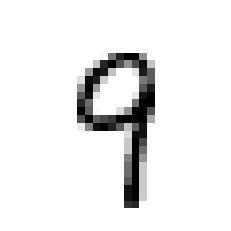

In [20]:
plot_digit(some_digit)

In [22]:
sdg_clf.predict([some_digit])

array([False])